# <a id='toc1_'></a>[Focusing light with a lens](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Focusing light with a lens](#toc1_)    
    - [XY scheme: Standard lens](#toc1_1_1_)    
  - [Check with XYZ](#toc1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>[XY scheme: Standard lens](#toc0_)

In [9]:
from diffractio import mm, um, degrees
from diffractio import np, plt
from diffractio.diffractio import Diffractio

In [10]:
diameter = 2 * mm
focal = 25 * mm
Df = 5 * mm

x0 = np.linspace(-diameter / 2, diameter / 2, 1024)
y0 = np.linspace(-diameter / 2, diameter / 2, 1024)

wavelength = 0.6238 * um

xout = np.linspace(-100 * um, 100 * um, 120)
yout = np.linspace(-100 * um, 100 * um, 122)
zout = np.linspace(focal - Df / 2, focal + Df / 2, 124)

In [11]:
u0 = Diffractio('scalar', 'source', x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

t0 = Diffractio('scalar', 'mask', x=x0, y=y0, wavelength=wavelength)
t0.lens(r0=(0 * um, 0 * um), radius=(diameter / 2, diameter / 2), focal=(focal-1*mm, focal+1*mm))

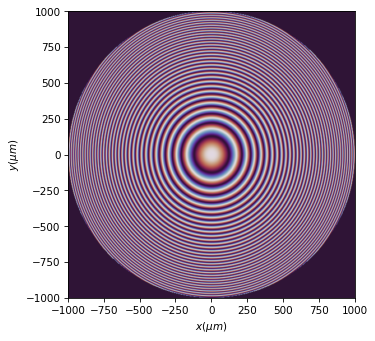

In [12]:
t0.draw("phase", percentage_intensity=0.01)

In [13]:
u1 = u0 * t0

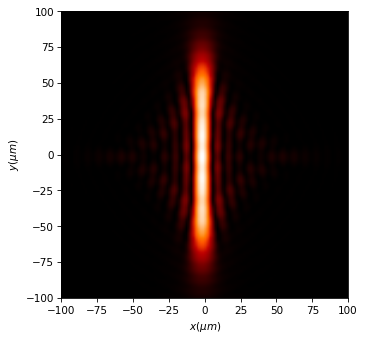

In [14]:
u2 = u1.CZT(z=focal-1*mm, xout=xout, yout=yout)
u2.draw(logarithm=1e-2)

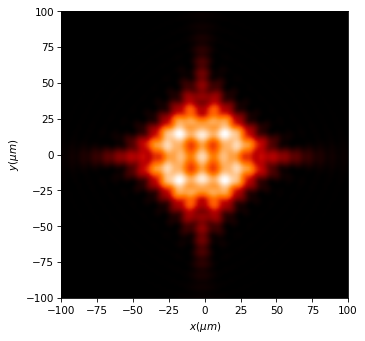

In [15]:
u2 = u1.CZT(z=focal, xout=xout, yout=yout)
u2.draw(logarithm=1e-2, scale='scaled')



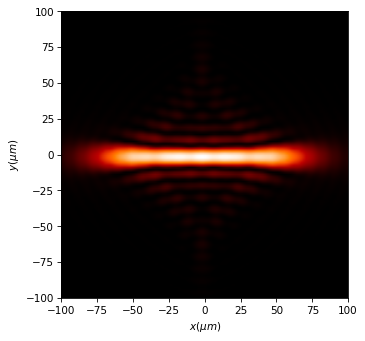

In [16]:
u2 = u1.CZT(z=focal+1*mm, xout=xout, yout=yout)
u2.draw(logarithm=1e-2)

num x, num y, num z = 120, 1, 124


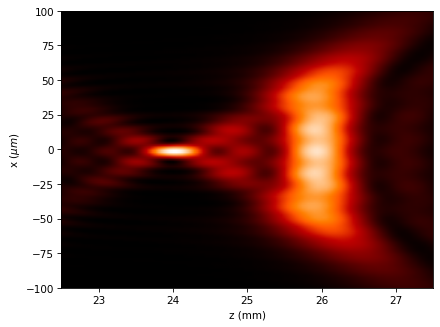

In [17]:
u2 = u1.CZT(z=zout, xout=xout, yout=0., verbose=True)
u2.draw(logarithm=1e-3, z_scale='mm', scale='auto')


num x, num y, num z = 1, 122, 124


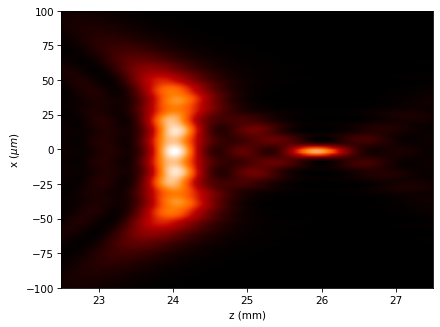

In [18]:
u2 = u1.CZT(z=zout, xout=0., yout=yout, verbose=True)
u2.draw(logarithm=0, z_scale='mm', scale='auto')

## <a id='toc1_2_'></a>[Check with XYZ](#toc0_)

num x, num y, num z = 120, 122, 124


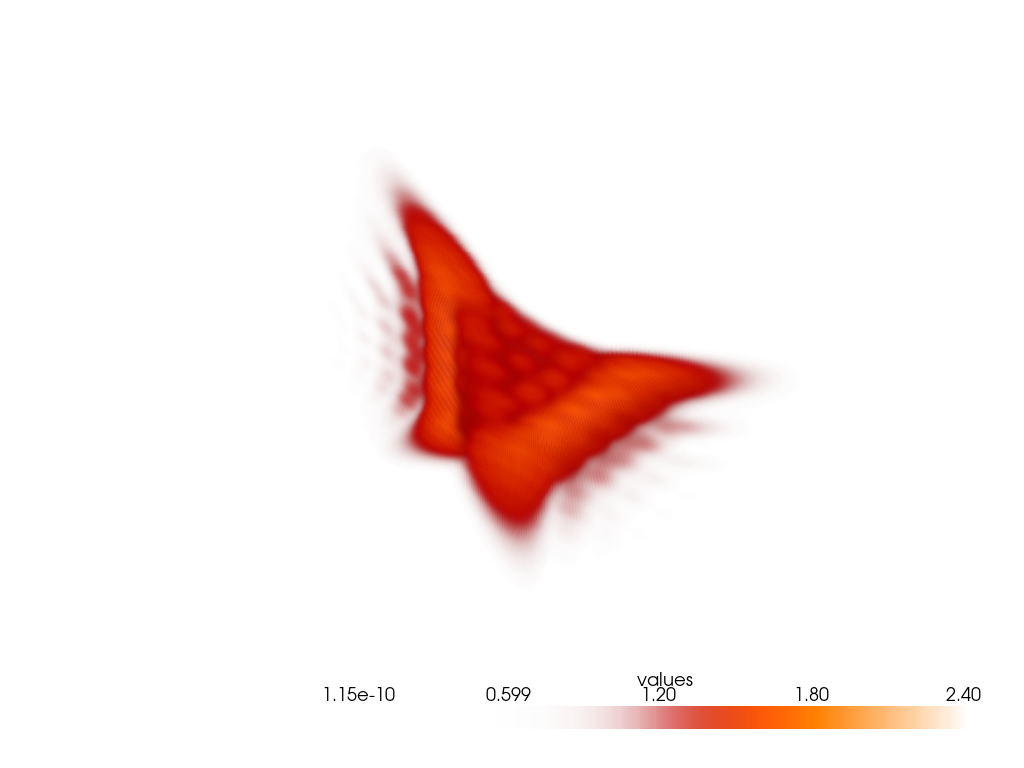

In [19]:
uxyz = u1.CZT(z=zout, xout=xout, yout=yout, verbose=True)
uxyz.draw_XYZ(logarithm=1e1)

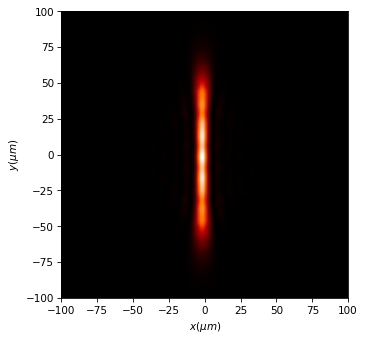

In [20]:
uxyz.draw_XY(z0=focal-1*mm)

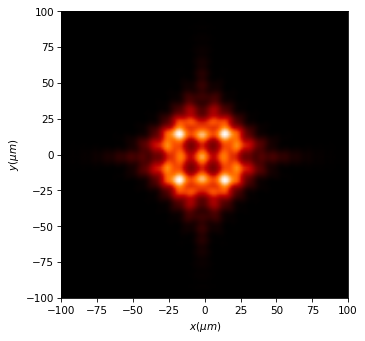

In [21]:
uxyz.draw_XY(z0=focal)

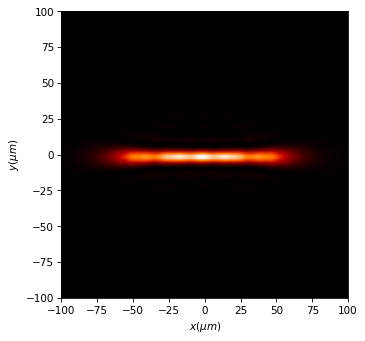

In [22]:
uxyz.draw_XY(z0=focal+1*mm)

<Figure size 480x360 with 0 Axes>

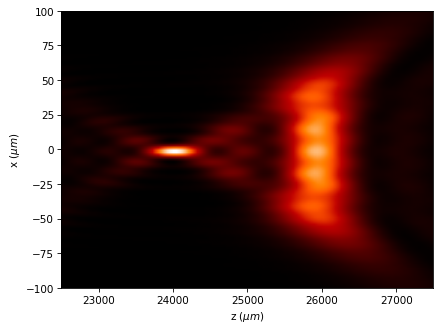

In [23]:
uxyz.draw_XZ(y0=0)

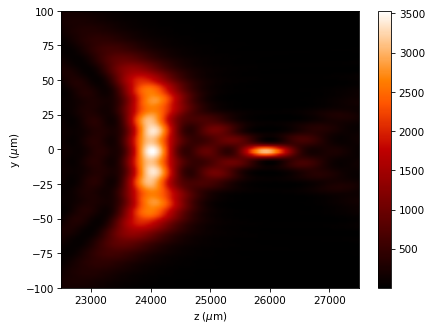

In [27]:
uxyz.draw_YZ(x0=0)